In [1]:
# importing libraries

import pandas_datareader.data as web
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sb
sb.set_style('whitegrid')
%matplotlib inline

In [2]:
# fetching data from the iex API

# setting the start and end date

start = datetime(2015, 11, 1)
end = datetime(2018, 11, 1)

# Bank of America
BAC = web.DataReader('BAC', 'iex', start, end)
# Goldman sachs
GS = web.DataReader('GS', 'iex', start, end)
#citi group
C = web.DataReader('C', 'iex', start, end)
# JPMorgan Chase
JPM = web.DataReader("JPM", 'iex', start, end)
# Morgan Stanley
MS = web.DataReader("MS", 'iex', start, end)

In [3]:
# creating names array for our dataframe

name =['BAC','C','GS','JPM','MS']

In [4]:
# joining all the data frame

stock_data= pd.concat([BAC,C,GS,JPM,MS], axis=1,keys=name)
stock_data.columns.names =['Bank name', 'Stock info']
stock_data.head(5)

Bank name       BAC                                              C           \
Stock info     open     high      low    close     volume     open     high   
date                                                                          
2015-11-02  16.0393  16.2671  16.0109  16.1912   56948218  51.0694  51.6427   
2015-11-03  16.1437  16.3810  16.1247  16.3051   66127070  51.1745  51.9676   
2015-11-04  16.4190  16.4284  16.0963  16.1437   78728433  51.9485  52.0727   
2015-11-05  16.1627  16.4854  16.1627  16.4284   85505498  51.3847  51.9771   
2015-11-06  16.9315  17.1687  16.8555  17.0359  158037510  53.2861  53.9454   

Bank name                                 ...         JPM                    \
Stock info      low    close    volume    ...        open     high      low   
date                                      ...                                 
2015-11-02  50.9643  51.4325  11999672    ...     59.8329  61.0398  59.7772   
2015-11-03  51.1363  51.7478  13518266    ...     60.6127  61.3647  60.5013   
2015-11-04  51.2701  51.4325  16985181    ...     61.2812  61.4111  60.9284   
2015-11-05  51.3561  51.7383  13632480    ...     61.0769  61.8939  61.0398   
2015-11-06  53.0186  53.3817  21654380    ...     63.4721  64.0848  63.2214   

Bank name                           MS                                       
Stock info    close    volume     open     high      low    close    volume  
date                                                                         
2015-11-02  60.8448  15253302  31.0035  31.5843  30.9286  31.3595   9887911  
2015-11-03  61.0676  11519476  31.1628  31.4157  30.9848  31.1815  11389795  
2015-11-04  61.1326  11388422  31.2845  31.4719  31.1336  31.2845   9125368  
2015-11-05  61.6804  12715877  31.4063  31.8934  31.2939  31.7341  12192336  
2015-11-06  63.5556  23262747  32.7270  33.3546  32.6427  33.1672  19355167  

[5 rows x 25 columns]

In [5]:
# checking the data
stock_data.index = pd.to_datetime(stock_data.index)

type(stock_data)
stock_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 757 entries, 2015-11-02 to 2018-11-01
Data columns (total 25 columns):
(BAC, open)      757 non-null float64
(BAC, high)      757 non-null float64
(BAC, low)       757 non-null float64
(BAC, close)     757 non-null float64
(BAC, volume)    757 non-null int64
(C, open)        757 non-null float64
(C, high)        757 non-null float64
(C, low)         757 non-null float64
(C, close)       757 non-null float64
(C, volume)      757 non-null int64
(GS, open)       757 non-null float64
(GS, high)       757 non-null float64
(GS, low)        757 non-null float64
(GS, close)      757 non-null float64
(GS, volume)     757 non-null int64
(JPM, open)      757 non-null float64
(JPM, high)      757 non-null float64
(JPM, low)       757 non-null float64
(JPM, close)     757 non-null float64
(JPM, volume)    757 non-null int64
(MS, open)       757 non-null float64
(MS, high)       757 non-null float64
(MS, low)        757 non-null float64
(MS, close

In [6]:
# checking the highest closing amount

close_highest= stock_data.xs(key= 'close', axis=1,level='Stock info').max()

# look like Goldman sachs has the highest closing price

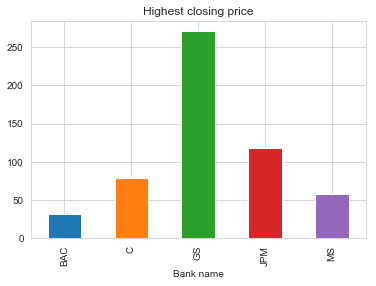

In [7]:
# Bar plot

close_highest.plot(kind='bar', title='Highest closing price')

In [8]:
# checking the lowest closing amount

close_lowest= stock_data.xs(key= 'close', axis=1,level='Stock info').min()

# look like Bank of America has the lowest closing amount

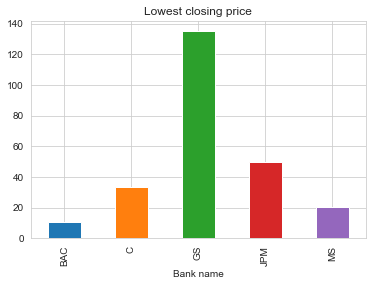

In [9]:
# Bar plot

close_lowest.plot(kind='bar', title='Lowest closing price')

In [10]:
# creating the return value with the pct_change()

# creating a dataFrame for the return amount
return_value = pd.DataFrame()

# creating a for loop to return the return amount each day

for names in name:
    return_value[names+' Return'] = stock_data[names]['close'].pct_change()
return_value.head()

,BAC Return,C Return,GS Return,JPM Return,MS Return
date,,,,,
2015-11-02,NaN,NaN,NaN,NaN,NaN
2015-11-03,0.007035,0.006130,0.005325,0.003662,-0.005676
2015-11-04,-0.009899,-0.006093,0.005034,0.001064,0.003303
2015-11-05,0.017635,0.005946,0.001931,0.008961,0.014371
2015-11-06,0.036979,0.031764,0.037236,0.030402,0.045160


C:\Users\Jubo\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


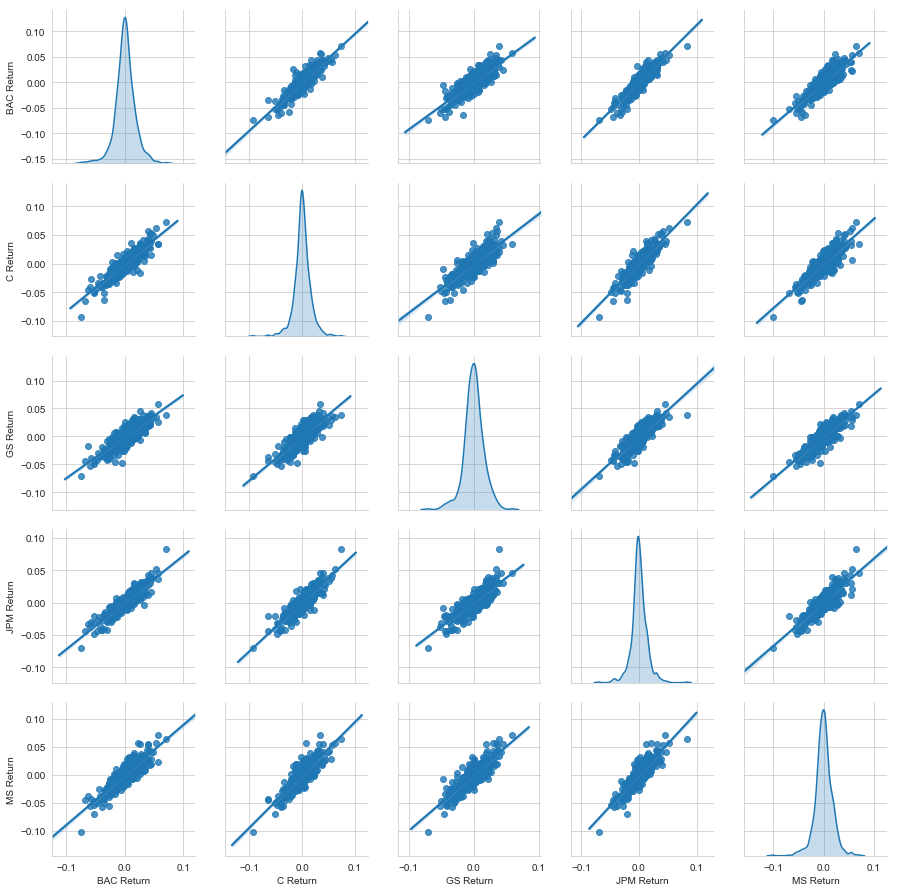

In [11]:
# creating a pair plot to find correlation of returns in different bank
# to create this data we have to ignore first row cause it has NA value
# we cretaed a regression plot for this

sb.pairplot(return_value[1:], kind='reg', diag_kind='kde')

# looks like the correlation is positive

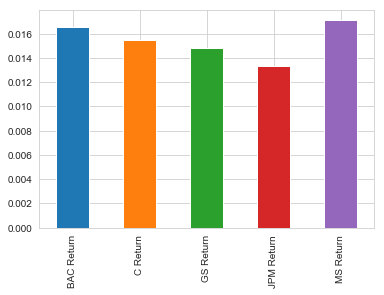

In [12]:
# analysing the risk profile
# for analysing it we will use the standard deviation

risk= return_value.std()

risk.plot(kind= 'bar')

# look like Morgan stanly is more volatile

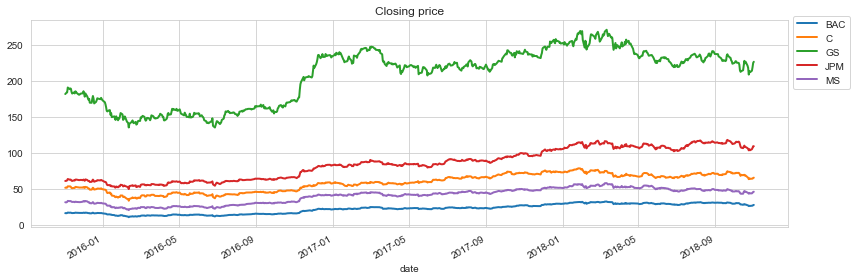

In [13]:
# line chart of closing price of the entire dataset

for names in name:
    stock_data[names]['close'].plot(kind='line', figsize=(12,4), title='Closing price',label= names,lw=2)
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.845))
plt.tick_params(axis='both', which='major', labelsize=10)
plt.tight_layout()


C:\Users\Jubo\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  after removing the cwd from sys.path.
C:\Users\Jubo\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """


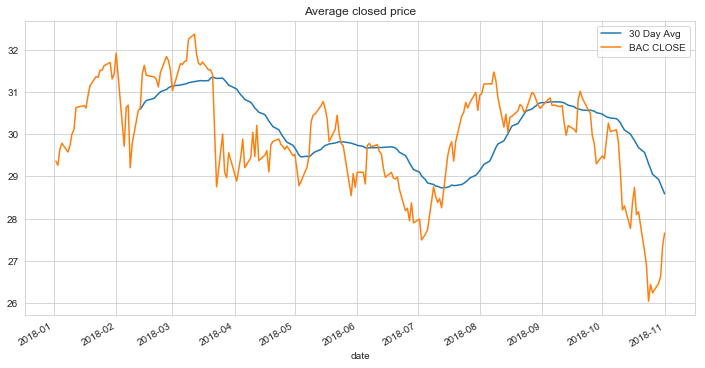

In [14]:
# 30 day average stock price of closed price of Bank of america for 2018

plt.figure(figsize=(12,6))
stock_data['BAC']['close'].ix['2018-01-01':'2018-11-01'].rolling(window=30).mean().plot(label='30 Day Avg')
stock_data['BAC']['close'].ix['2018-01-01':'2018-11-01'].plot(label='BAC CLOSE')
plt.title("Average closed price")
plt.legend()



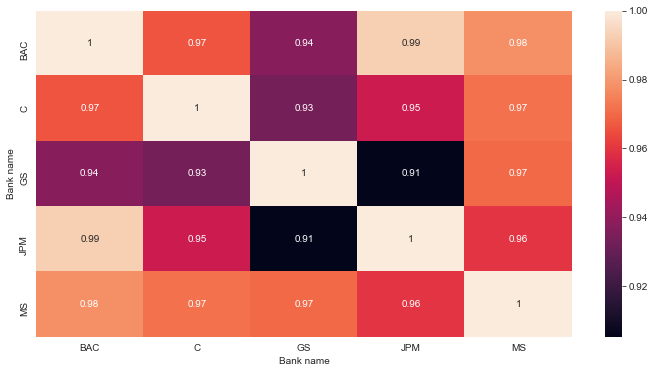

In [15]:
# correlation plot of the return value of the entire data

plt.figure(figsize=(12,6))
sb.heatmap(stock_data.xs(key='close',axis=1,level='Stock info').corr(),annot=True)

In [16]:
# worst drop of value in a day
# interesting.. It's all same date
#let's plot this month!

return_value.idxmin()

BAC Return   2016-06-24
C Return     2016-06-24
GS Return    2016-06-24
JPM Return   2016-06-24
MS Return    2016-06-24
dtype: datetime64[ns]

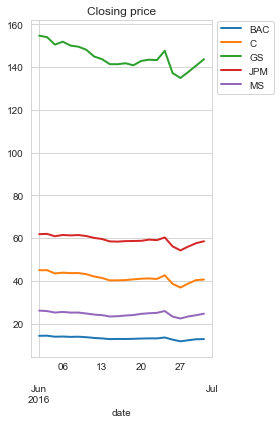

In [17]:
# line chart of closing price of June, 2016

for names in name:
    stock_data[names]['2016-06-01':'2016-06-30']['close'].plot(kind='line', 
                                                               figsize=(4,6), title='Closing price',label= names,lw=2)
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.89))
plt.tick_params(axis='both', which='major', labelsize=10)
plt.tight_layout()

In [18]:
# worst gain of value in a single day

return_value.idxmax()

BAC Return   2016-02-12
C Return     2016-02-12
GS Return    2016-11-09
JPM Return   2016-02-12
MS Return    2016-11-09
dtype: datetime64[ns]